# Experiment - 4 (Ridge and Lasso Regression)

Name : Shruti Hore

PRN : 24070126172

---

**Title:** Implementation of Ridge and Lasso Regression

**Aim:** To apply Ridge and Lasso regression algorithms for prediction and model regularization

---

**Objective:**

-	Implementation of Ridge and Lasso regression algorithms on the given dataset(s).

-	To compare and contrast both algorithms' performance and understand their impact on model regularization.

-	To visualize and interpret the results effectively.

---

**Problem statement**

- Use the given datasets to demonstrate Ridge and Lasso regression, predicting a dependent variable based on independent variables while applying regularization to prevent overfitting.

---


# Theory
**Ridge Regression** is a linear regression technique that applies L2 regularization. It penalizes large coefficients by adding the square of the coefficients to the loss function. Ridge regression reduces model complexity and handles multicollinearity effectively.

**Lasso Regression**  applies L1 regularization, which adds the absolute value of coefficients to the loss function. It not only reduces overfitting but also performs feature selection by shrinking some coefficients to zero.

Lasso regression reduces the number of independent variables affecting the output.

Ridge regression reduces the weight each independent variable has on the output.

---

### Applications of Ridge and Lasso Regression
- Housing price prediction
- Medical data analysis
- Finance and stock market prediction
- Feature selection in machine learning models

---

### **Algorithm / Stepwise Procedure**

1. Load the dataset
2. Separate features and target variables
3. Split the dataset into training and testing sets
4. Apply feature scaling
5. Train Ridge and Lasso regression models
6. Predict output values
7. Evaluate model performance
8. Visualize results

# Data Preprocessing


In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the Energy Efficiency dataset
data = pd.read_excel('(4) ENB2012_data.xlsx')
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
# Separate features and target variables
X = data.iloc[:, 0:8]     # Independent variables
y1 = data.iloc[:, 8]      # Heating Load
y2 = data.iloc[:, 9]      # Cooling Load

# for heating load (y1)

In [ ]:
# Train-Test Split for Heating Load
X_train, X_test, y1_train, y1_test = train_test_split(X, y1,
                                                      test_size=0.2,
                                                      random_state=67)

In [ ]:
# Standardize features to apply regularization correctly
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
features = X.columns

# LASSO Regression Implementation (L1)

In [ ]:
lasso_y1 = Lasso(alpha=1)
lasso_y1.fit(X_train_scaled, y1_train)
y1_pred_lasso = lasso_y1.predict(X_test_scaled)

print("Lasso Regression - Heating Load (y1)")
print("\nMSE : ", mean_squared_error(y1_test, y1_pred_lasso))
print("\nR2 Score : ", r2_score(y1_test, y1_pred_lasso))
print("\nCoefficients : \n", lasso_y1.coef_)

Lasso Regression - Heating Load (y1)

MSE :  10.450337131445984

R2 Score :  0.8986885708079267

Coefficients : 
 [ 0.         -0.          1.47406226 -0.          7.54696166 -0.
  1.7152762   0.        ]


# Ridge Regression Implementation (L2)

In [ ]:
ridge_y1 = Ridge(alpha=1)
ridge_y1.fit(X_train_scaled, y1_train)
y1_pred_ridge = ridge_y1.predict(X_test_scaled)

print("Ridge Regression - Heating Load (y1)")
print("\nMSE : ", mean_squared_error(y1_test, y1_pred_ridge))
print("\nR2 Score : ", r2_score(y1_test, y1_pred_ridge))
print("\nCoefficients : \n", ridge_y1.coef_)

Ridge Regression - Heating Load (y1)

MSE :  7.6717571348023395

R2 Score :  0.925625683653541

Coefficients : 
 [-5.0787896  -2.4932949   1.03691508 -2.9233341   7.89096585 -0.10845502
  2.69976038  0.35601294]


# for cooling load (y2)

In [ ]:
# Train-Test Split
X_train, X_test, y2_train, y2_test = train_test_split(X, y2,
                                                      test_size=0.2,
                                                      random_state=67)

In [ ]:
lasso_y2 = Lasso(alpha=1)
lasso_y2.fit(X_train_scaled, y2_train)
y2_pred_lasso = lasso_y2.predict(X_test_scaled)

print("Lasso Regression - Cooling Load (y2)")
print("\nMSE : ", mean_squared_error(y2_test, y2_pred_lasso))
print("\nR2 Score : ", r2_score(y2_test, y2_pred_lasso))
print("\nCoefficients : \n", lasso_y2.coef_)

Lasso Regression - Cooling Load (y2)

MSE :  14.651049478078956

R2 Score :  0.8419159932224256

Coefficients : 
 [ 0.         -0.          1.00487682 -0.          7.22544111  0.
  0.90714884  0.        ]


In [ ]:
ridge_y2 = Ridge(alpha=1)
ridge_y2.fit(X_train_scaled, y2_train)
y2_pred_ridge = ridge_y2.predict(X_test_scaled)

print("Ridge Regression - Cooling Load (y2)")
print("\nMSE : ", mean_squared_error(y2_test, y2_pred_ridge))
print("\nR2 Score : ", r2_score(y2_test, y2_pred_ridge))
print("\nCoefficients : \n", ridge_y2.coef_)

Ridge Regression - Cooling Load (y2)

MSE :  10.874873942559663

R2 Score :  0.8826607166528877

Coefficients : 
 [-5.64356232e+00 -2.61655058e+00  3.54605111e-01 -2.71625780e+00
  8.20022370e+00  8.04752066e-03  1.95858500e+00  7.55560366e-02]


In [ ]:
# Predictions
y1_pred_ridge = ridge_y1.predict(X_test_scaled)
y1_pred_lasso = lasso_y1.predict(X_test_scaled)

y2_pred_ridge = ridge_y2.predict(X_test_scaled)
y2_pred_lasso = lasso_y2.predict(X_test_scaled)

# Evaluation Function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    accuracy = r2 * 100
    return mse, r2, accuracy

# Results
print("Heating Load (y1)")
mse, r2, acc = evaluate_model(y1_test, y1_pred_ridge)
print(f"Ridge → MSE: {mse:.4f}  R2: {r2:.4f}  Accuracy(%): {acc:.4f}")

mse, r2, acc = evaluate_model(y1_test, y1_pred_lasso)
print(f"Lasso → MSE: {mse:.4f}  R2: {r2:.4f}  Accuracy(%): {acc:.4f}")

print("\nCooling Load (y2)")
mse, r2, acc = evaluate_model(y2_test, y2_pred_ridge)
print(f"Ridge → MSE: {mse:.4f}  R2: {r2:.4f}  Accuracy(%): {acc:.4f}")

mse, r2, acc = evaluate_model(y2_test, y2_pred_lasso)
print(f"Lasso → MSE: {mse:.4f}  R2: {r2:.4f}  Accuracy(%): {acc:.4f}")

Heating Load (y1)
Ridge → MSE: 7.6718  R2: 0.9256  Accuracy(%): 92.5626
Lasso → MSE: 10.4503  R2: 0.8987  Accuracy(%): 89.8689

Cooling Load (y2)
Ridge → MSE: 10.8749  R2: 0.8827  Accuracy(%): 88.2661
Lasso → MSE: 14.6510  R2: 0.8419  Accuracy(%): 84.1916


# Visulaization

### Ridge vs Lasso for Heating Load (y1)

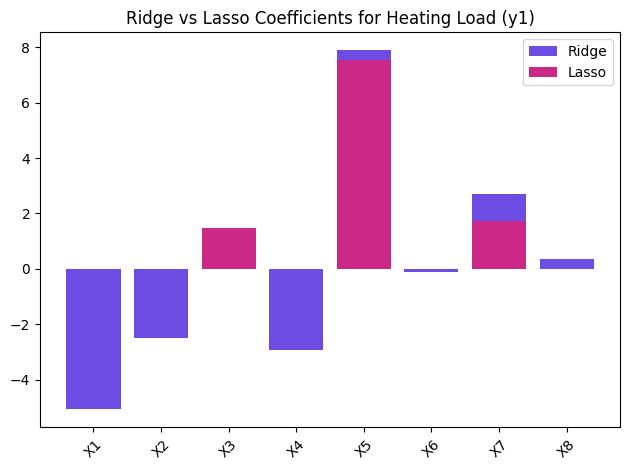

In [ ]:
plt.figure()
plt.bar(features, ridge_y1.coef_, label="Ridge", color='#6C4CE2')
plt.bar(features, lasso_y1.coef_, label="Lasso", color='#CB2888')
plt.xticks(rotation=45)
plt.title("Ridge vs Lasso Coefficients for Heating Load (y1)")
plt.legend()
plt.tight_layout()
plt.show()

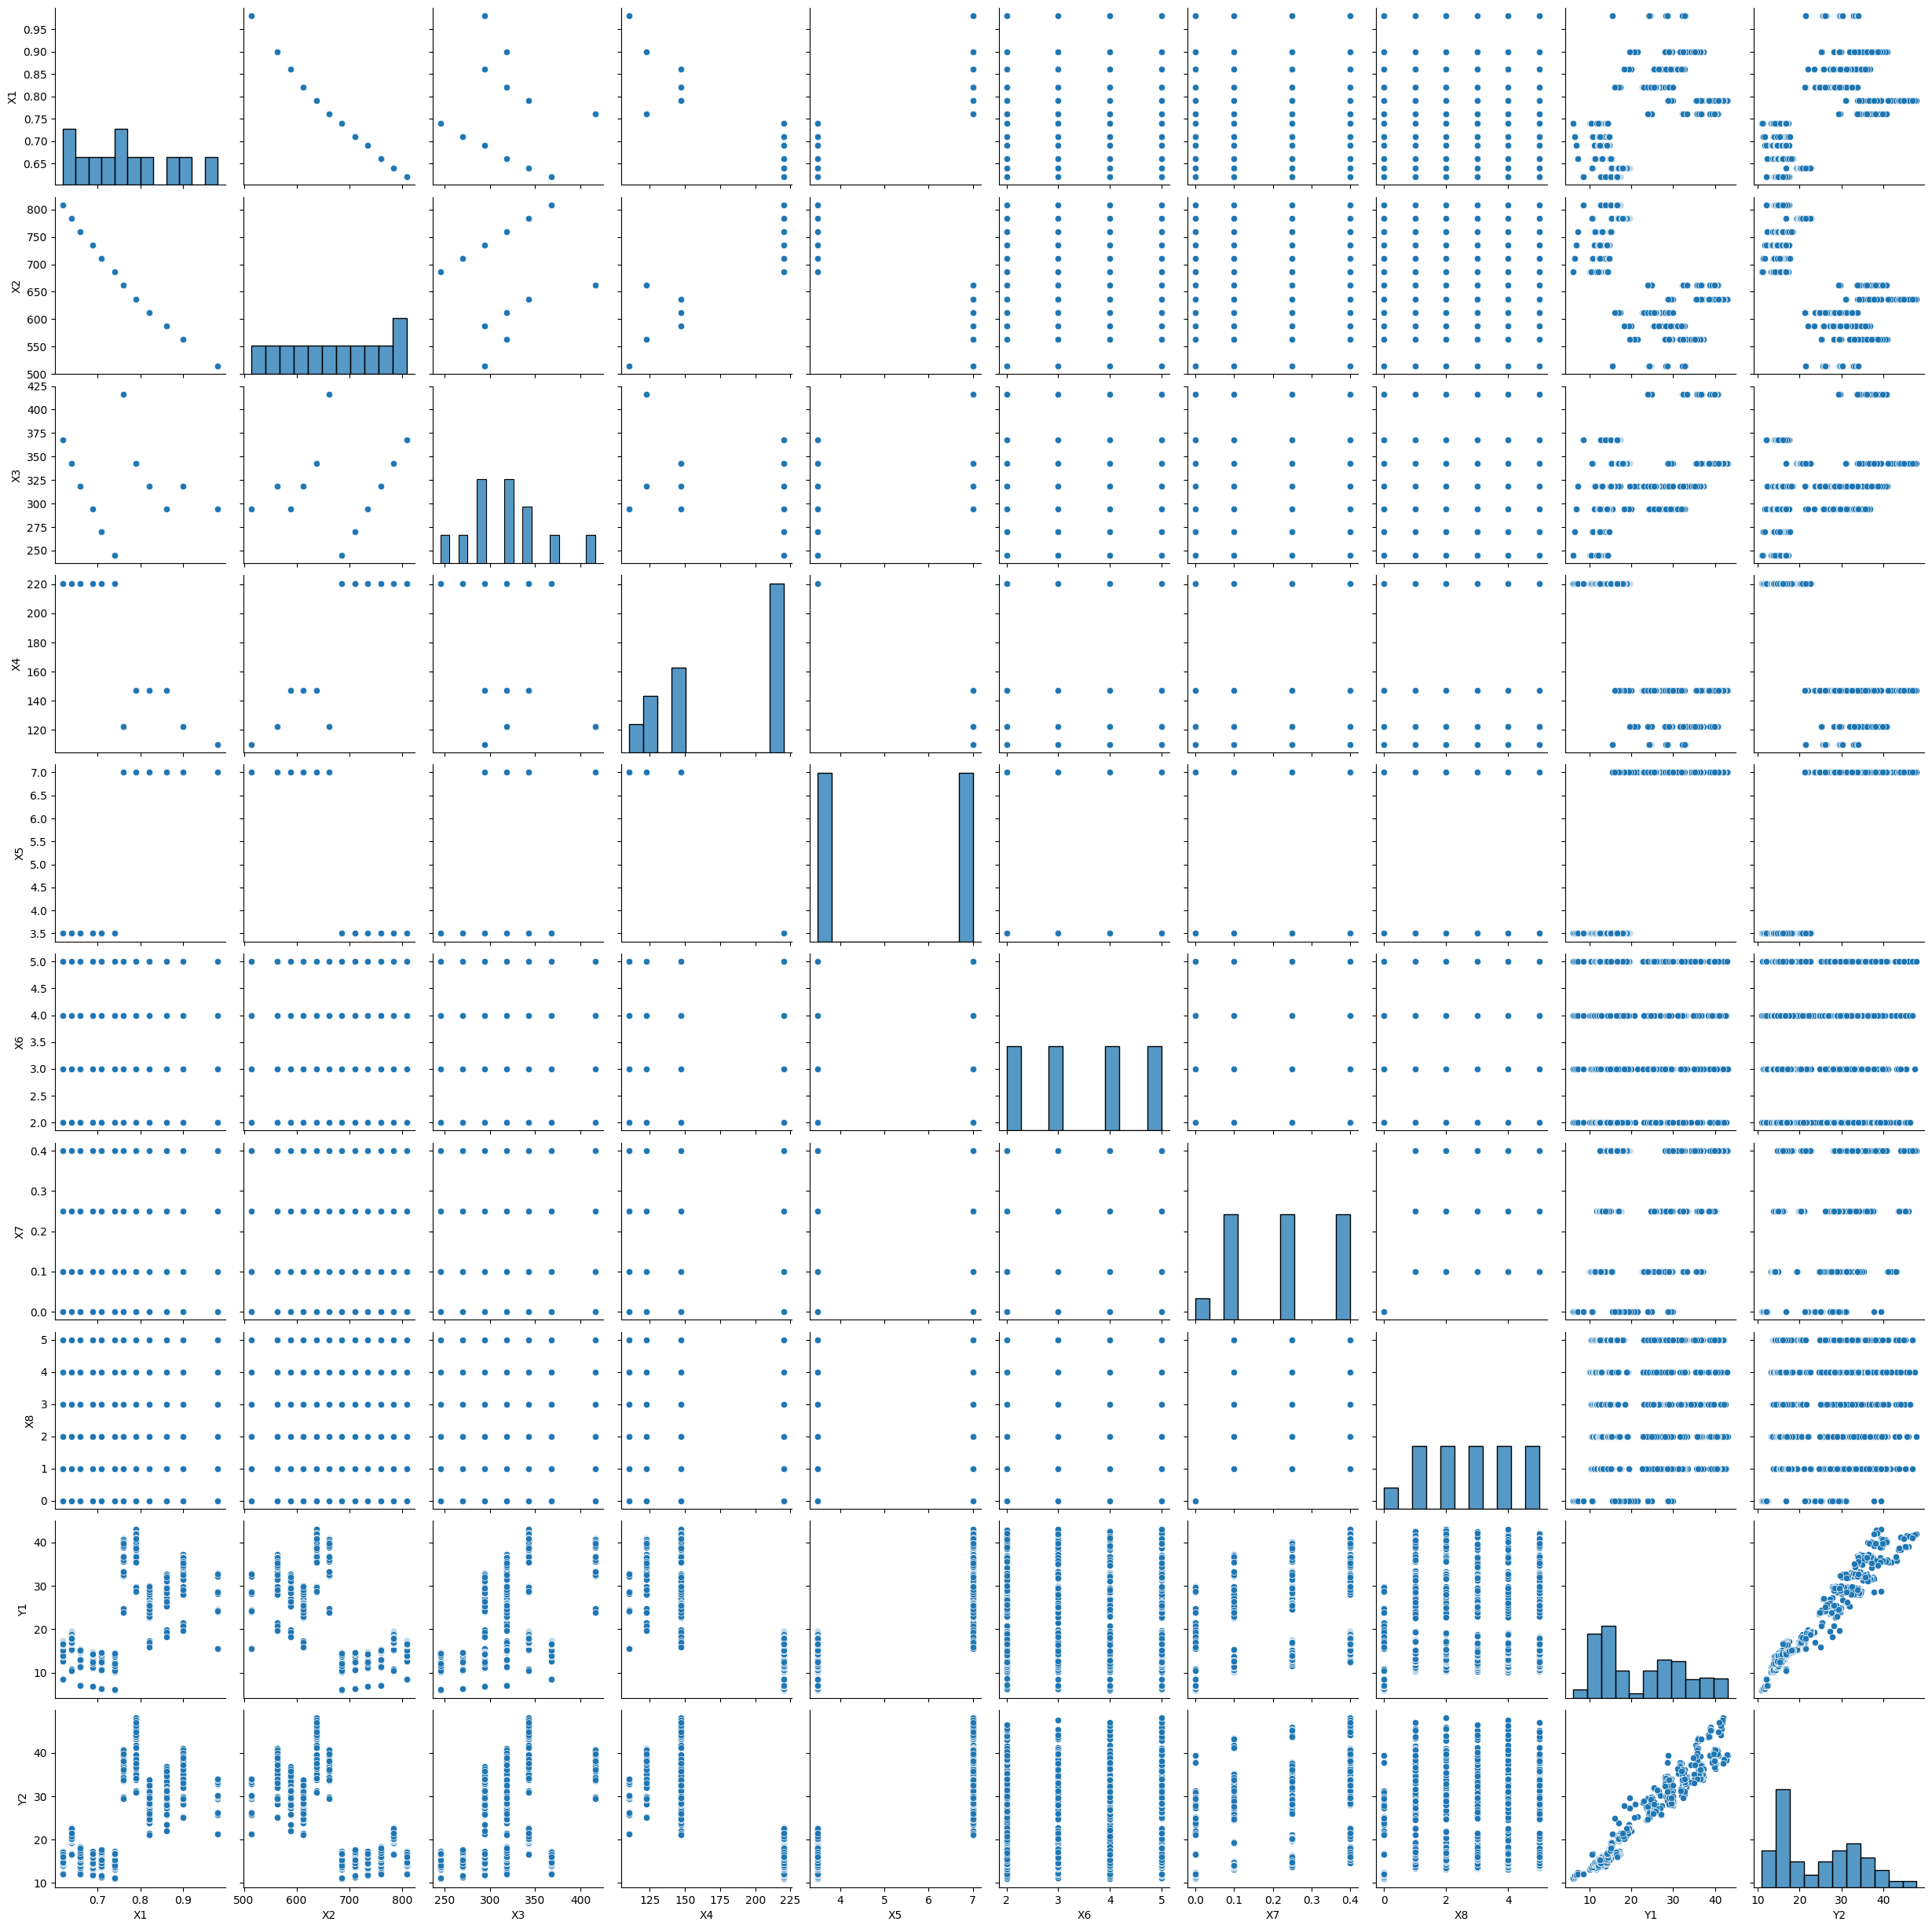

In [ ]:
sns.pairplot(data)

### Ridge vs Lasso for Cooling Load (y2)

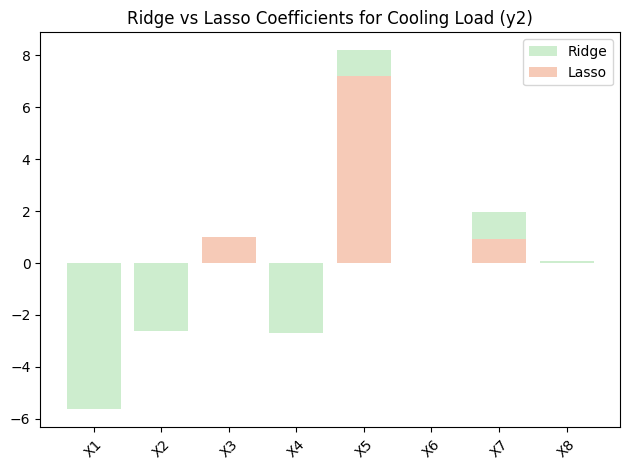

In [ ]:
plt.figure()
plt.bar(features, ridge_y2.coef_, label="Ridge", color='#CDEDCE')
plt.bar(features, lasso_y2.coef_, label="Lasso", color='#F6CAB7')
plt.xticks(rotation=45)
plt.title("Ridge vs Lasso Coefficients for Cooling Load (y2)")
plt.legend()
plt.tight_layout()
plt.show()

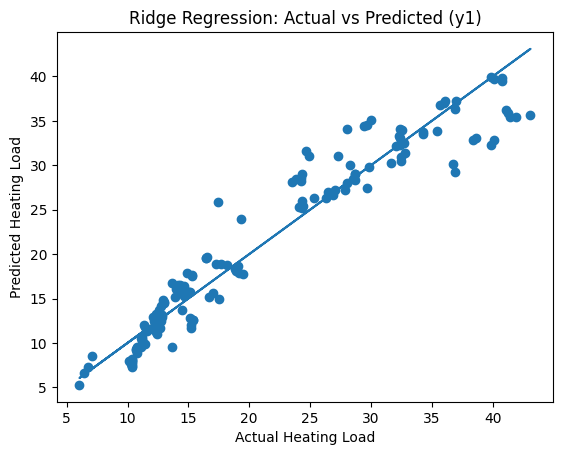

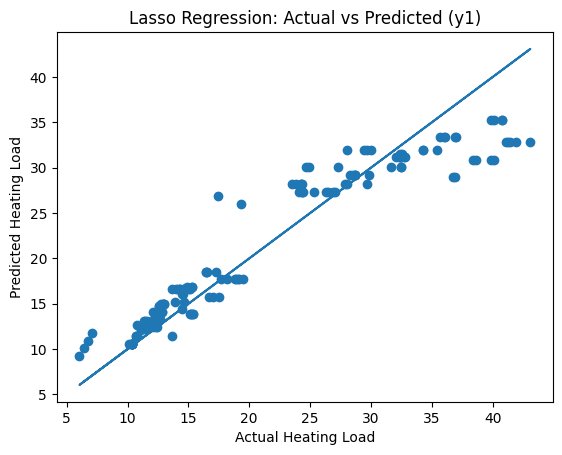

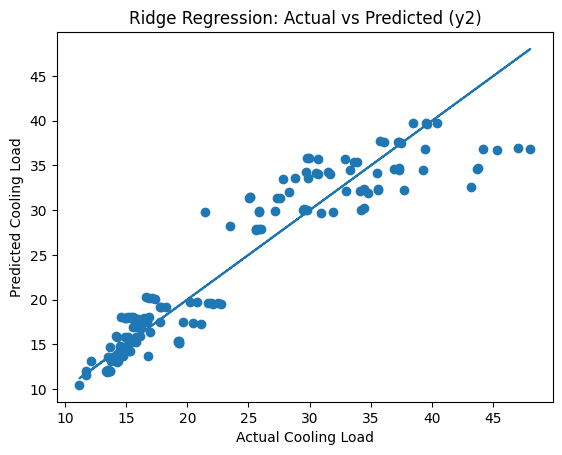

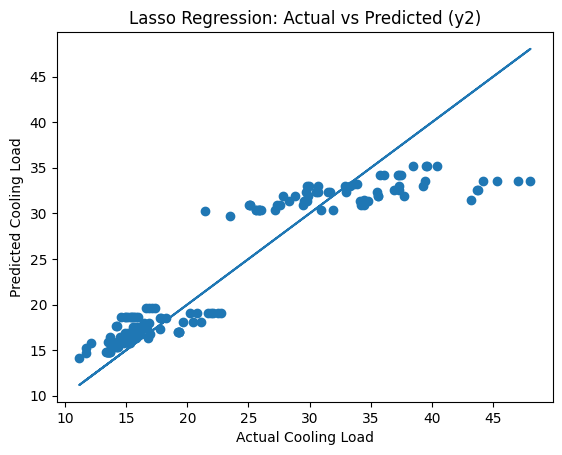

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predictions
y1_pred_ridge = ridge_y1.predict(X_test_scaled)
y1_pred_lasso = lasso_y1.predict(X_test_scaled)

y2_pred_ridge = ridge_y2.predict(X_test_scaled)
y2_pred_lasso = lasso_y2.predict(X_test_scaled)

# y1 (Heating Load)
plt.figure()
plt.scatter(y1_test, y1_pred_ridge)
plt.plot(y1_test, y1_test)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Ridge Regression: Actual vs Predicted (y1)")
plt.show()

plt.figure()
plt.scatter(y1_test, y1_pred_lasso)
plt.plot(y1_test, y1_test)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Lasso Regression: Actual vs Predicted (y1)")
plt.show()

# y2 (Cooling Load)
plt.figure()
plt.scatter(y2_test, y2_pred_ridge)
plt.plot(y2_test, y2_test)
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Ridge Regression: Actual vs Predicted (y2)")
plt.show()

plt.figure()
plt.scatter(y2_test, y2_pred_lasso)
plt.plot(y2_test, y2_test)
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Lasso Regression: Actual vs Predicted (y2)")
plt.show()


In [ ]:
alphas = [0.01, 0.1, 1, 10, 20]

ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y1_train)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scaled, y1_train)
    lasso_coefs.append(lasso.coef_)

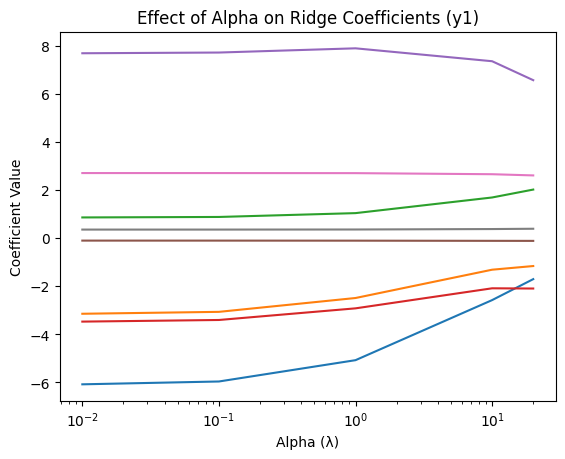

In [ ]:
plt.figure()
for i in range(len(X.columns)):
    plt.plot(alphas, [coef[i] for coef in ridge_coefs])

plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("Coefficient Value")
plt.title("Effect of Alpha on Ridge Coefficients (y1)")
plt.show()

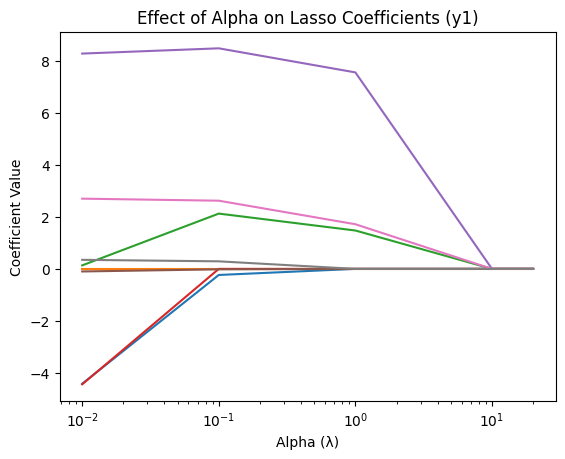

In [ ]:
plt.figure()
for i in range(len(X.columns)):
    plt.plot(alphas, [coef[i] for coef in lasso_coefs])

plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("Coefficient Value")
plt.title("Effect of Alpha on Lasso Coefficients (y1)")
plt.show()

As the value of alpha increases, Ridge regression reduces the magnitude of all coefficients, whereas Lasso regression eliminates less important features by forcing some coefficients to zero.

So:

- Alpha controls model complexity

- Proper tuning of alpha is essential for optimal performance

- Ridge is preferred when all features are relevant

- Lasso is preferred when feature selection is required

<Axes: >

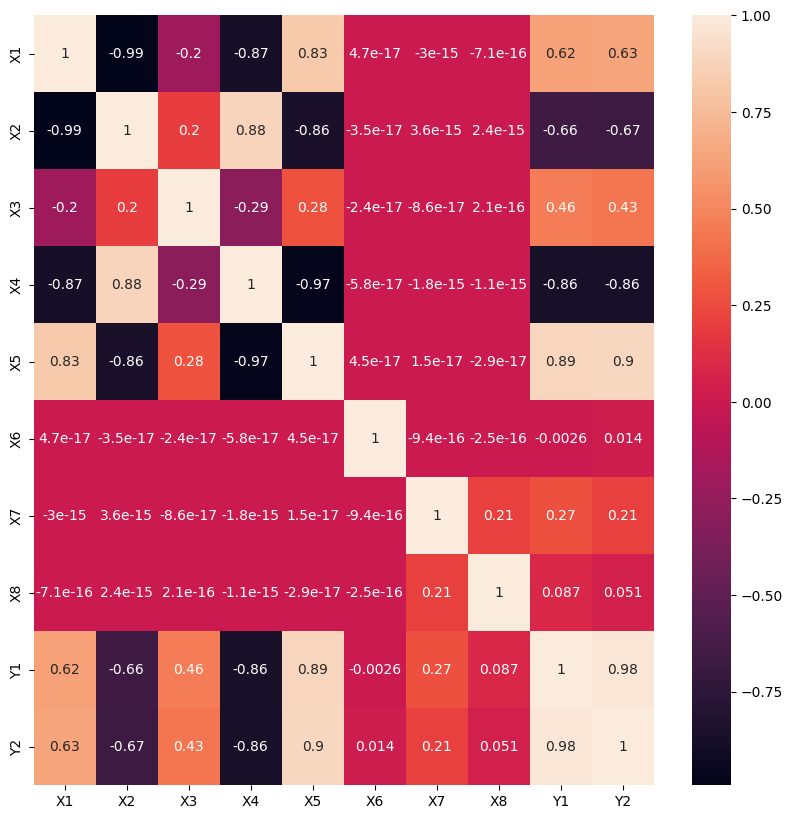

In [ ]:
#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot = True)

### Input & Output
**Input:**
- Energy Efficiency dataset
- User-defined regularization parameter (λ)

**Output:**
- Predicted Heating and Cooling Load values
- Model evaluation metrics
- Visual comparison of coefficients

# Conclusion

- Ridge and Lasso regression effectively regularize linear models.

- Ridge regression is suitable when all features contribute to the prediction, while Lasso regression is useful for feature selection.

- Performance metrics such as MSE and R² score are essential for evaluating and comparing both models.

- Ridge is better for y1 while Lasso is suitable for y2.